<a href="https://colab.research.google.com/github/hyakuroume/Generative_AI/blob/develop/04_diffusion_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q genaibook

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 137.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 78.1 MB/s eta 0:00:00


In [2]:
# 事前訓練済みモデルのロード
import torch
from diffusers import DDPMPipeline

from genaibook.core import get_device

# CPUかGPUのどれを使用するかデバイスに設定
device = get_device()

# パイプラインの読み込み
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device)

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


DDPMPipeline {
  "_class_name": "DDPMPipeline",
  "_diffusers_version": "0.36.0",
  "_name_or_path": "google/ddpm-celebahq-256",
  "scheduler": [
    "diffusers",
    "DDPMScheduler"
  ],
  "unet": [
    "diffusers",
    "UNet2DModel"
  ]
}

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


model_index.json:   0%|          | 0.00/180 [00:00<?, ?B/s]

Fetching 4 files:   0%|          | 0/4 [00:00<?, ?it/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/455M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/790 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/2 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--google--ddpm-celebahq-256/snapshots/cd5c944777ea2668051904ead6cc120739b86c4d.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/1000 [00:00<?, ?it/s]

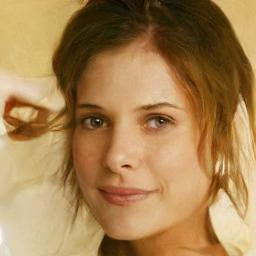

In [ ]:
# 事前訓練済みモデルのロード
import torch
from diffusers import DDPMPipeline

from genaibook.core import get_device

# CPUかGPUのどれを使用するかデバイスに設定
device = get_device()

# パイプラインの読み込み
image_pipe = DDPMPipeline.from_pretrained("google/ddpm-celebahq-256")
image_pipe.to(device)

# 画像をサンプリング
image_pipe().images[0]

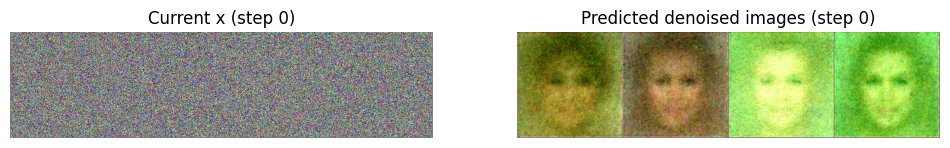

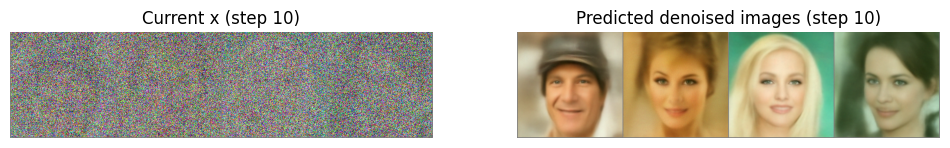

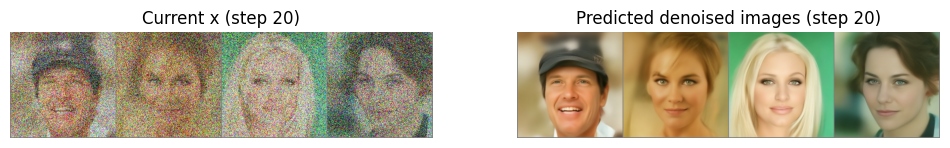

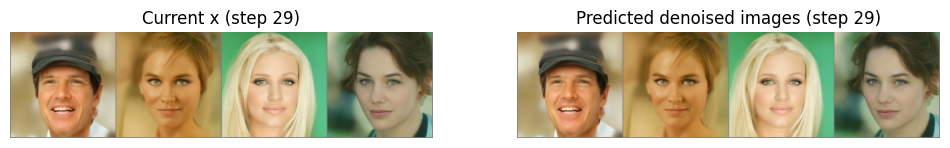

In [ ]:
from genaibook.core import plot_noise_and_denoise

image = torch.randn(4, 3, 256, 256).to(device)

# 拡散ステップ数の指定
image_pipe.scheduler.set_timesteps(num_inference_steps=30)

# サンプリングのタイムステップを繰り返す
for i, t in enumerate(image_pipe.scheduler.timesteps):
    with torch.inference_mode():
        noise_pred = image_pipe.unet(image, t)["sample"]

        # スケジューラーで更新後のxを計算する
        scheduler_output = image_pipe.scheduler.step(noise_pred, t, image)

        # xを更新する
        image = scheduler_output.prev_sample

        # xと予測したノイズ除去後の画像の両方を一定回数毎に表示する
        if i % 10 == 0 or i == len(image_pipe.scheduler.timesteps) - 1:
            plot_noise_and_denoise(scheduler_output, i)

## 拡散モデルの訓練

In [3]:
from datasets import load_dataset

# 蝶の画像データセットのロード
dataset = load_dataset("huggan/smithsonian_butterflies_subset", split="train")

README.md:   0%|          | 0.00/609 [00:00<?, ?B/s]

Repo card metadata block was not found. Setting CardData to empty.


dataset_infos.json: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/237M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1000 [00:00<?, ? examples/s]

In [4]:
# 画像の前処理

from torchvision import transforms

image_size = 64


preprocess = transforms.Compose(
    [
        transforms.Resize((image_size, image_size)), #リサイズ
        transforms.RandomHorizontalFlip(), # ランダムフリップ
        transforms.ToTensor(), # テンソルに変換
        transforms.Normalize([0.5], [0.5]) # -1から1の範囲になるよう変換
    ]
)

In [5]:
def transform(examples)-> dict:
    """
    与えられた画像に対して前処理を行う

    args:
        examples: 前処理をする画像

    return:
        imagesがキーの前処理後の画像の辞書
    """

    examples = [preprocess(image) for image in examples["image"]]
    return {"images": examples}

In [6]:
dataset.set_transform(transform)
batch_size = 16

In [7]:
# データローダーの作成
train_dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=batch_size, shuffle=True
)

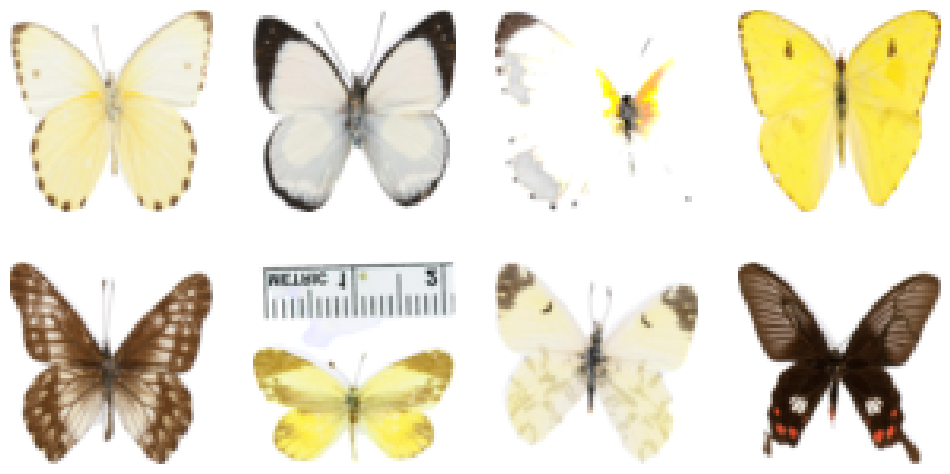

In [8]:
# 前処理後の画像の表示
from genaibook.core import show_images

batch = next(iter(train_dataloader))

show_images(batch["images"][:8] * 0.5 + 0.5)

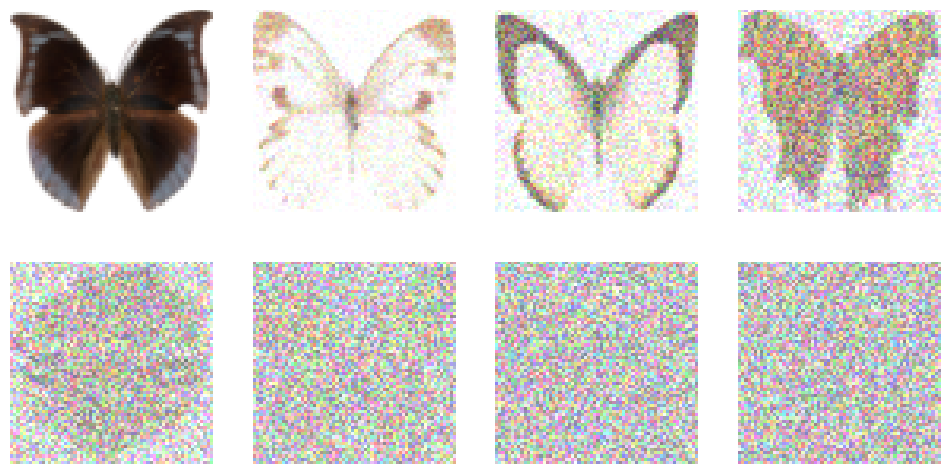

In [ ]:
# ノイズの付加
from diffusers import DDPMScheduler

scheduler = DDPMScheduler(
    num_train_timesteps=1000, beta_start=0, beta_end=0.02
)

# タイムステップの作成(0~999を８分割)
timesteps = torch.linspace(0, 999, 8).long()

# データセットから画像を読み込みノイズを付加
x = batch["images"][:8]
noise = torch.rand_like(x)
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))

In [ ]:
# Unetの作成
from diffusers import UNet2DModel
model = UNet2DModel(
    in_channels = 3,
    sample_size = 64,
    block_out_channels = (64, 128, 256, 512),
    down_block_types=(
        "DownBlock2D",
        "DownBlock2D",
        "AttnDownBlock2D",
        "AttnDownBlock2D",
    ),
    up_block_types=(
        "AttnUpBlock2D",
        "AttnUpBlock2D",
        "UpBlock2D",
        "UpBlock2D",
    ),
).to(device)

In [ ]:
# 動作確認
with torch.inference_mode():
    out = model(noised_x.to(device), timestep=timesteps.to(device)).sample

print(noised_x.shape)
print(out.shape)

torch.Size([8, 3, 64, 64])
torch.Size([8, 3, 64, 64])


In [ ]:
# 訓練
from torch.nn import functional as F

num_epochs = 50 # エポック数
lr = 1e-4 # 学習率
optimizer = torch.optim.AdamW(model.parameters(), lr=lr) # 最適化アルゴリズム
losses = [] #　損失を保存

# モデルの訓練
for epoch in range(num_epochs):
    for batch in train_dataloader:
        # 入力画像を読み込む
        clean_images = batch["images"].to(device)

        # 画像に加えるノイズをサンプリングする
        noise = torch.randn(clean_images.shape).to(device)

        # 各画像ごとにランダムなタイムステップをサンプリングする
        timesteps = torch.randint(
            0,
            scheduler.config.num_train_timesteps,
            (clean_images.shape[0],),
            device=device,
        ).long()

        # タイムステップごとのノイズ量に従って画像にノイズを加える
        noisy_images = scheduler.add_noise(clean_images, noise, timesteps)

        # ノイズに対するモデルの予測値を得る
        noise_pred = model(noisy_images, timesteps, return_dict=False)[0]

        # 予測値と実際ノイズを比較
        loss = F.mse_loss(noise_pred, noise)

        # 後で表示できるように損失を保存する
        losses.append(loss.item())

        # 損失に基づきモデルのパラメータを更新
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

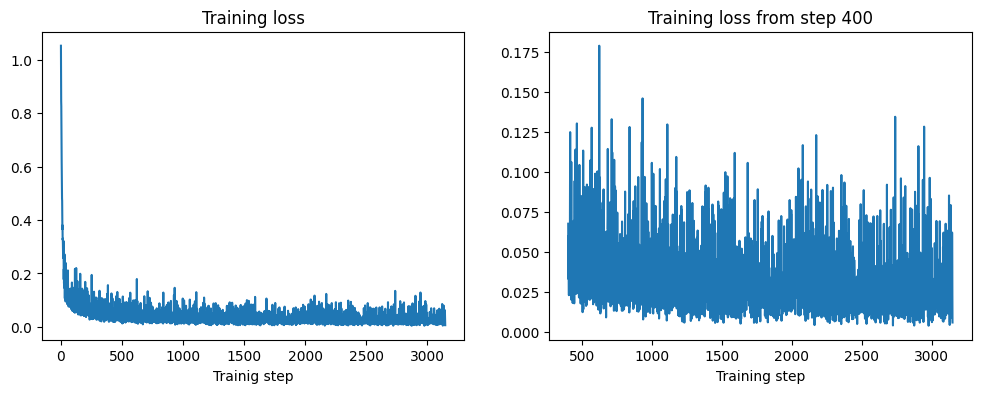

In [ ]:
# 訓練損失の描画
import  matplotlib.pyplot as plt

plt.subplots(1, 2, figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title("Training loss")
plt.xlabel("Trainig step")

plt.subplot(1, 2, 2)
plt.plot(range(400, len(losses)), losses[400:])
plt.title("Training loss from step 400")
plt.xlabel("Training step");

In [9]:
x = next(iter(train_dataloader))["images"][:8]
noise = torch.rand_like(x)

In [10]:
def corrupt(x, noise, amount):
    # amountが元のデータに適合するように形状を変更する
    amount = amount.view(-1, 1, 1, 1)

    # 指定したamountに基づき、元データとノイズを統合する
    return(
        x * (1 - amount) + noise* amount
    )

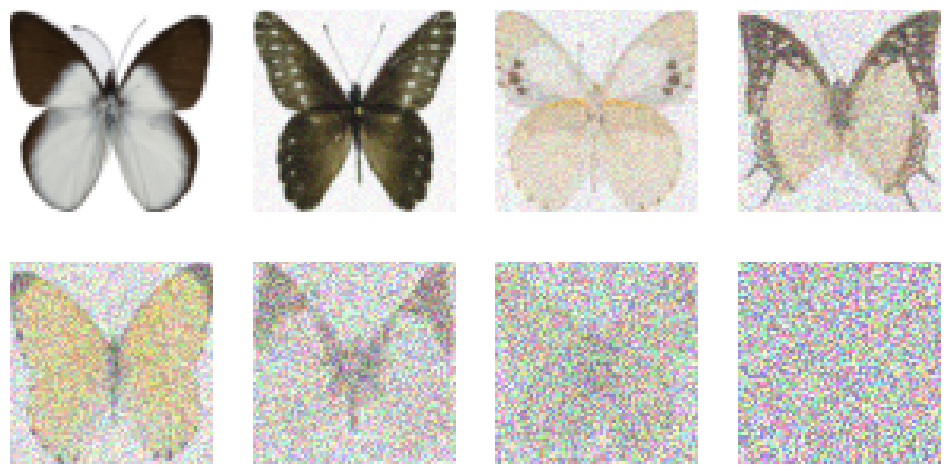

In [11]:
amount = torch.linspace(0, 1, 8)
noised_x = corrupt(x, noise, amount)
show_images(noised_x * 0.5 + 0.5)

In [17]:
class SimpleScheduler:
    def __init__(self):
        self.num_train_timesteps = 1000

    def add_noise(self, x, noise, timesteps):
        amount = timesteps / self.num_train_timesteps
        return corrupt(x, noise, amount)

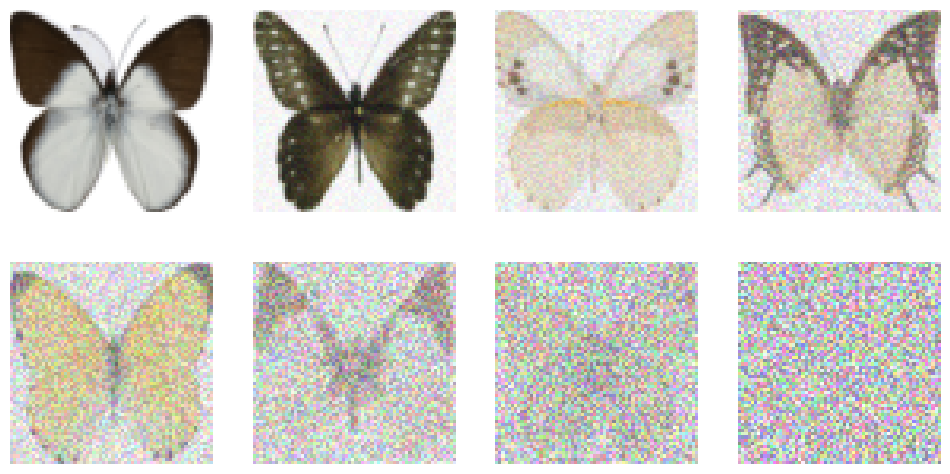

In [18]:
scheduler = SimpleScheduler()
timesteps = torch.linspace(0, 999, 8).long()
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images(noised_x * 0.5 + 0.5)

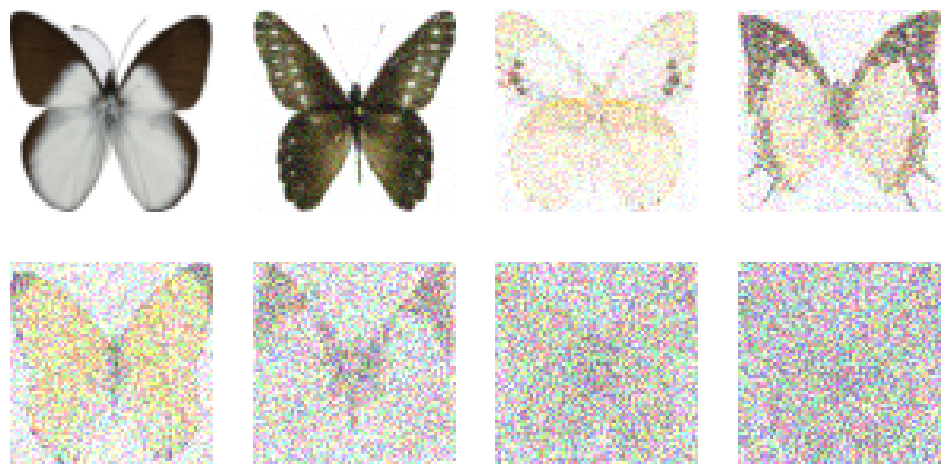

In [21]:
# DDPMSchedulerと比較
scheduler = DDPMScheduler(beta_end=0.01)
timesteps = torch.linspace(0, 999, 8).long()
noised_x = scheduler.add_noise(x, noise, timesteps)
show_images((noised_x * 0.5 + 0.5).clip(0, 1))